In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

In [7]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

tf.config.list_physical_devices('GPU')

In [8]:
train_data = tf.keras.utils.image_dataset_from_directory('./inputs/tiny-imagenet-200/train/')

Found 100001 files belonging to 200 classes.
Metal device set to: Apple M1 Pro


2022-11-27 01:45:11.181319: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-27 01:45:11.181437: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
test_data = tf.keras.utils.image_dataset_from_directory('./inputs/tiny-imagenet-200/test/')

Found 10000 files belonging to 1 classes.


In [38]:
val_annot = pd.read_csv('./inputs/tiny-imagenet-200/val/val_annotations.txt', sep='\t', header=None, names=['File', 'Class', 'X', 'Y', 'H', 'W'])

In [39]:
val_annot

,File,Class,X,Y,H,W
0,val_0.JPEG,n03444034,0,32,44,62
1,val_1.JPEG,n04067472,52,55,57,59
2,val_2.JPEG,n04070727,4,0,60,55
3,val_3.JPEG,n02808440,3,3,63,63
4,val_4.JPEG,n02808440,9,27,63,48
...,...,...,...,...,...,...
9995,val_9995.JPEG,n03085013,0,0,63,63
9996,val_9996.JPEG,n03444034,0,9,63,63
9997,val_9997.JPEG,n03424325,10,10,38,42
9998,val_9998.JPEG,n01629819,28,18,63,31


In [44]:
val_annot_dict = val_annot[['File', 'Class']].set_index('File').to_dict()['Class']

In [47]:
val_img_dir = './inputs/tiny-imagenet-200/val/images/'
for img, folder in val_annot_dict.items():
    newpath = (os.path.join(val_img_dir, folder))
    print(newpath)
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    if os.path.exists(os.path.join(val_img_dir, img)):
        os.rename(os.path.join(val_img_dir, img), os.path.join(newpath, img))

./inputs/tiny-imagenet-200/val/images/n03444034
./inputs/tiny-imagenet-200/val/images/n04067472
./inputs/tiny-imagenet-200/val/images/n04070727
./inputs/tiny-imagenet-200/val/images/n02808440
./inputs/tiny-imagenet-200/val/images/n02808440
./inputs/tiny-imagenet-200/val/images/n04399382
./inputs/tiny-imagenet-200/val/images/n04179913
./inputs/tiny-imagenet-200/val/images/n02823428
./inputs/tiny-imagenet-200/val/images/n04146614
./inputs/tiny-imagenet-200/val/images/n02226429
./inputs/tiny-imagenet-200/val/images/n04371430
./inputs/tiny-imagenet-200/val/images/n07753592
./inputs/tiny-imagenet-200/val/images/n02226429
./inputs/tiny-imagenet-200/val/images/n03770439
./inputs/tiny-imagenet-200/val/images/n02056570
./inputs/tiny-imagenet-200/val/images/n02906734
./inputs/tiny-imagenet-200/val/images/n02125311
./inputs/tiny-imagenet-200/val/images/n04486054
./inputs/tiny-imagenet-200/val/images/n04285008
./inputs/tiny-imagenet-200/val/images/n03763968
./inputs/tiny-imagenet-200/val/images/n0

In [10]:
val_data = tf.keras.utils.image_dataset_from_directory('./inputs/tiny-imagenet-200/val/images/')

Found 10000 files belonging to 200 classes.


In [11]:
train_data.as_numpy_iterator().next()[0].shape

2022-11-27 01:45:12.036455: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


(32, 256, 256, 3)

In [22]:
train_class_names = train_data.class_names
val_class_names = val_data.class_names

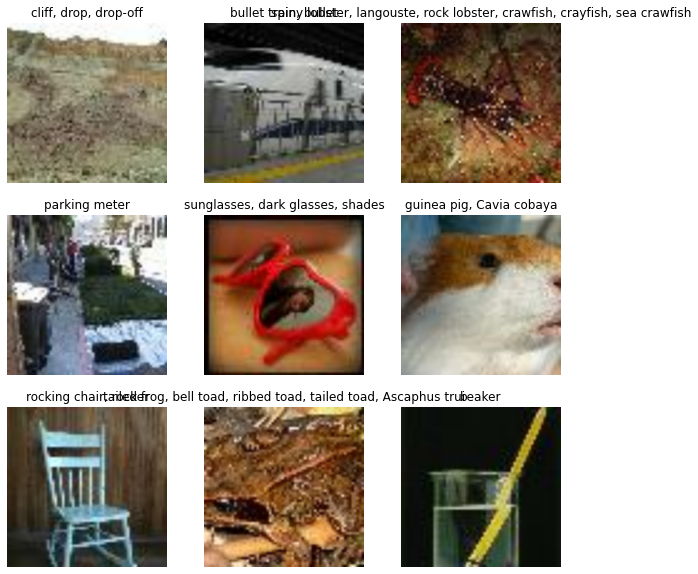

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_class_names[labels[i]])
    plt.axis("off")


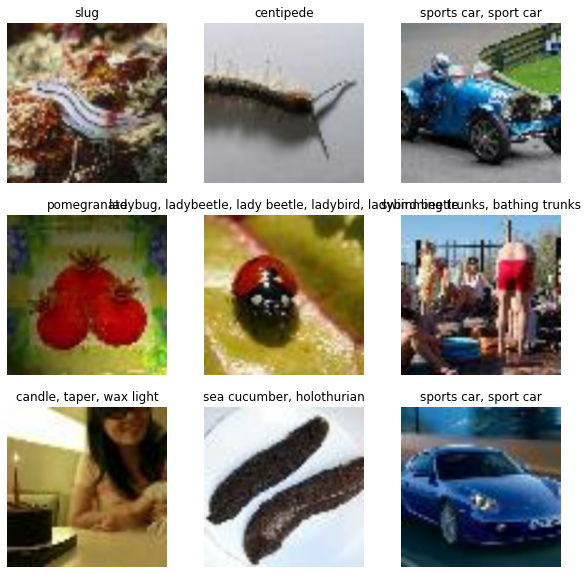

In [24]:
plt.figure(figsize=(10, 10))
for images, labels in val_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(val_class_names[labels[i]])
    plt.axis("off")

In [25]:
words = pd.read_csv('./inputs/tiny-imagenet-200/words.txt', sep='\t', header=None, names=['file', 'label'])

In [26]:
words_dict = words.set_index('file').to_dict()['label']

In [27]:
train_labels, val_labels = [], []
for i in train_data.class_names:
    train_labels.append(words_dict.get(i))
for i in val_data.class_names:
    val_labels.append(words_dict.get(i))

In [28]:
train_data.class_names = train_labels
val_data.class_names = val_labels

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()
le.fit(train_data.class_names)
train_data.class_names = le.transform(train_data.class_names)

In [31]:
train_data = train_data.map(lambda x,y: (x/255, y))
val_data = val_data.map(lambda x,y: (x/255, y))

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation

In [33]:
model = Sequential()


In [30]:
# Different model
# """Block 1"""
# model.add(Conv2D(128, (3, 3), strides=(1,1), padding='same', input_shape=(256,256,3)))
# model.add(BatchNormalization())
# model.add(Conv2D(128, (3, 3), strides=(1,1), padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
# model.add(Activation('relu'))

# """Block 2"""
# model.add(Conv2D(128, (3, 3), strides=(1,1), padding='same'))
# model.add(BatchNormalization())
# model.add(Conv2D(128, (3, 3), strides=(1,1), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# """Block 3"""
# model.add(Conv2D(128, (3, 3), strides=(1,1), padding='same'))
# model.add(BatchNormalization())
# model.add(Conv2D(128, (3, 3), strides=(1,1), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# """Block 4"""
# model.add(Conv2D(256, (3, 3), strides=(1,1), padding='same'))
# model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), strides=(1,1), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# """Block 5"""
# model.add(Flatten())
# model.add(Dense(4096))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# """Block Test"""
# model.add(Dense(1024))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# """Output Layer"""
# model.add(Dense(200)) # pass num_classes

# """Loss Layer"""
# model.add(Activation('softmax'))

In [31]:
# Original
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(200, activation='softmax'))

In [32]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [33]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 64)      

In [34]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train_data, epochs=20, validation_data=val_data, callbacks=[tensorboard_callback])
# hist = model.fit(train_data, epochs=5, validation_data=val_data, callbacks=[tensorboard_callback])

Epoch 1/20


2022-11-27 00:24:33.041923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3126/3126 [==============================] - ETA: 0s - loss: 4.8321 - accuracy: 0.0446

2022-11-27 00:27:39.067116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3126/3126 [==============================] - 192s 61ms/step - loss: 4.8321 - accuracy: 0.0446 - val_loss: 4.3978 - val_accuracy: 0.0902
Epoch 2/20
3126/3126 [==============================] - 190s 61ms/step - loss: 4.1263 - accuracy: 0.1274 - val_loss: 3.9316 - val_accuracy: 0.1478
Epoch 3/20
3126/3126 [==============================] - 193s 62ms/step - loss: 3.7465 - accuracy: 0.1827 - val_loss: 3.8110 - val_accuracy: 0.1743
Epoch 4/20
3126/3126 [==============================] - 189s 60ms/step - loss: 3.4939 - accuracy: 0.2236 - val_loss: 3.6539 - val_accuracy: 0.2009
Epoch 5/20
3126/3126 [==============================] - 187s 60ms/step - loss: 3.3016 - accuracy: 0.2573 - val_loss: 3.6264 - val_accuracy: 0.2029
Epoch 6/20
3126/3126 [==============================] - 188s 60ms/step - loss: 3.1425 - accuracy: 0.2821 - val_loss: 3.7053 - val_accuracy: 0.2009
Epoch 7/20
3126/3126 [==============================] - 187s 60ms/step - loss: 3.0027 - accuracy: 0.3071 - val_loss: 3.8503 - val

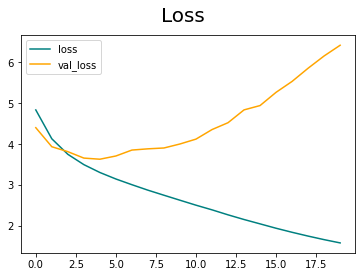

In [59]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

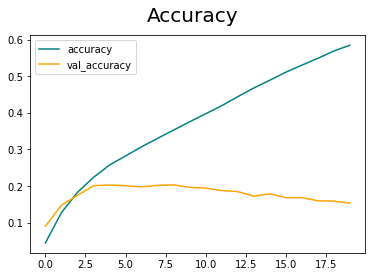

In [60]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()